In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from numpy.fft import fft, ifft
from scipy.signal import find_peaks
from scipy import signal
from scipy.signal import argrelextrema
py.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from catboost import CatBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [374]:
def saude_dispositivo(nome_dispositivo, frequencia_fundamental):
  media_microondas = 0.0455562124177421
  media_geladeira = 0.0151194129639961
  limiar = 30

  if nome_dispositivo == 'microwave':
    erro = ((frequencia_fundamental - media_microondas) / media_microondas) * 100
  if nome_dispositivo == 'refrigerator':
    erro = ((frequencia_fundamental - media_geladeira) / media_geladeira) * 100

  if abs(erro) < limiar:
    return 0
  elif abs(erro) >= limiar and erro > 0:
    return 1
  elif abs(erro) >= limiar and erro < 0:
    return -1

In [375]:
df = pd.read_csv('/content/drive/MyDrive/PCOMP/dataSetPCOMP.csv')
filtro  = df['device'] != "airConditioner"
df = df[filtro]
filtro  = df['device'] != "monitor"
df = df[filtro]
filtro  = df['device'] != "fan"
df = df[filtro]
df

,f_60,f_120,f_180,f_240,f_300,f_360,f_420,f_480,f_540,f_600,...,f_720,f_780,f_840,f_900,f_960,f_1020,f_1080,f_1140,f_1200,device
0,0.050333,0.000000,0.014676,0.000000,0.012999,0.003011,0.006827,0.001199,0.000489,0.001158,...,0.000766,0.002805,0.000000,0.001116,0.000541,0.001074,0.000413,0.000979,0.000724,microwave
1,0.042935,0.000000,0.020715,0.000000,0.017020,0.000000,0.006085,0.001350,0.001674,0.002207,...,0.000000,0.003827,0.000757,0.001828,0.000924,0.002003,0.001353,0.000000,0.001371,microwave
2,0.041060,0.000000,0.021710,0.003339,0.014148,0.002724,0.009262,0.003693,0.001803,0.000000,...,0.001725,0.002197,0.001957,0.000857,0.001364,0.001421,0.000000,0.001726,0.000000,microwave
3,0.045386,0.000000,0.014240,0.000000,0.016942,0.003260,0.008512,0.002953,0.002747,0.002880,...,0.001342,0.002726,0.000000,0.001712,0.001216,0.001194,0.000877,0.001102,0.001549,microwave
4,0.050650,0.000000,0.014819,0.003330,0.013558,0.000000,0.006696,0.001534,0.000000,0.000632,...,0.000813,0.002995,0.000000,0.001151,0.000000,0.001070,0.000000,0.001244,0.000751,microwave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000104,0.000000,0.000210,0.000000,0.000100,0.000000,0.000154,0.000081,0.000129,0.000221,...,0.000171,0.000167,0.000167,0.000113,0.000000,0.000209,0.000000,0.000133,0.000000,refrigerator
1196,0.000281,0.000000,0.000314,0.000259,0.000339,0.000361,0.000273,0.000158,0.000000,0.000287,...,0.000401,0.000158,0.000218,0.000177,0.000000,0.000324,0.000271,0.000000,0.000187,refrigerator
1197,0.000177,0.000164,0.000196,0.000117,0.000202,0.000174,0.000153,0.000155,0.000311,0.000099,...,0.000174,0.000256,0.000226,0.000145,0.000000,0.000284,0.000121,0.000169,0.000000,refrigerator
1198,0.000000,0.000223,0.000000,0.000000,0.000169,0.000214,0.000000,0.000120,0.000000,0.000115,...,0.000288,0.000132,0.000000,0.000151,0.000000,0.000165,0.000115,0.000187,0.000174,refrigerator


In [376]:
classes = ["microwave", "refrigerator"]
X = df.drop(columns=['device'])
y = df['device'].apply(classes.index).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [377]:
best_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)
best_model.fit(x_train, y_train)

x_test_list = [x_test.iloc[i].to_numpy() for i in range(x_test.shape[0])]

In [378]:
normal = 0
alta = 0
baixa = 0
total = 0
for i, x in enumerate(x_test_list):
    x_array = np.array([x])
    frequencia_fundamental = x_array[0][0]
    if frequencia_fundamental > 0:
      total = total + 1
      prediction = best_model.predict(x_array)[0]
      result = saude_dispositivo(classes[prediction], frequencia_fundamental)

      if result == 0:
        normal = normal + 1
      elif result == -1:
        baixa = baixa + 1
      elif result == 1:
        alta = alta + 1

baixa_percent = round((baixa / total) * 100, 2)
normal_percent = round((normal / total) * 100, 2)
alta_percent = round((alta / total) * 100, 2)

print(f"baixa: {baixa_percent}%")
print(f"Normal: {normal_percent}%")
print(f"alta: {alta_percent}%")

baixa: 28.5%
Normal: 71.5%
alta: 0.0%


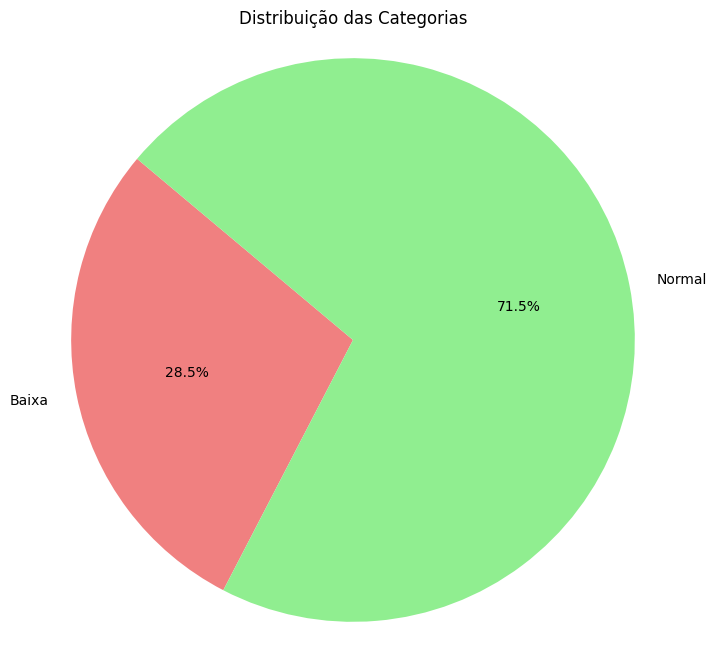

In [379]:
categorias = ['Baixa', 'Normal']
percentagens = [baixa_percent, normal_percent]
cores = ['lightcoral', 'lightgreen', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(percentagens, labels=categorias, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Categorias')
plt.axis('equal')
plt.show()

In [380]:
data = np.array([[0.05033308646,	0,	0.01467614171,	0,	0.01299852157,	0.003010847843,	0.006827211444,	0.001198800361,	0.0004894829274,	0.001158066965,	0.002826189006,	0.0007661253373,	0.002804903397,	0,	0.001115797007,	0.000540737148,	0.001074299365,	0.0004129105819,	0.0009791815238,	0.0007242020574]])
best_return = best_model.predict(data)
device = classes[best_return[0]]

saude_dispositivo(device, data[0][0])

0

In [381]:
data = np.array([[0.1033308646,	0,	0.01467614171,	0,	0.01299852157,	0.003010847843,	0.006827211444,	0.001198800361,	0.0004894829274,	0.001158066965,	0.002826189006,	0.0007661253373,	0.002804903397,	0,	0.001115797007,	0.000540737148,	0.001074299365,	0.0004129105819,	0.0009791815238,	0.0007242020574]])
best_return = best_model.predict(data)
device = classes[best_return[0]]

saude_dispositivo(device, data[0][0])

1

In [382]:
data = np.array([[0.01577101107,	0,	0.003726356838,	0.0004855189876,	0.001098758692,	0.0004000746685,	0.0003815533514,	0,	0.0002652059325,	0.0002301630374,	0.0002106450116,	0,	0.0001964976191,	0.0001803623192,	0,	0.0001675895282,	0.0001890943729,	0.0001714320476,	0,	0.0001411881245]])
best_return = best_model.predict(data)
device = classes[best_return[0]]

saude_dispositivo(device, data[0][0])

0

In [383]:
data = np.array([[0.00577101107,	0,	0.003726356838,	0.0004855189876,	0.001098758692,	0.0004000746685,	0.0003815533514,	0,	0.0002652059325,	0.0002301630374,	0.0002106450116,	0,	0.0001964976191,	0.0001803623192,	0,	0.0001675895282,	0.0001890943729,	0.0001714320476,	0,	0.0001411881245]])
best_return = best_model.predict(data)
device = classes[best_return[0]]

saude_dispositivo(device, data[0][0])

-1